In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
data = pd.read_csv('/Users/chaule/Downloads/ds/911/911.csv')
df = data.copy()

<h3> Quick look at data </h3>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
df.describe(include='all')

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
count,663522.000000,663522.000000,663522,583323.000000,663522,663522,663229,663522,663522.0
unique,NaN,NaN,663282,NaN,148,640754,68,41292,NaN
top,NaN,NaN,CITY AVE & CARDINAL AVE; LOWER MERION; Statio...,NaN,Traffic: VEHICLE ACCIDENT -,2018-10-06 19:26:38,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD,NaN
freq,NaN,NaN,5,NaN,148372,9,55490,7285,NaN
mean,40.158162,-75.300105,NaN,19236.055791,NaN,NaN,NaN,NaN,1.0
std,0.220641,1.672884,NaN,298.222637,NaN,NaN,NaN,NaN,0.0
min,0.000000,-119.698206,NaN,1104.000000,NaN,NaN,NaN,NaN,1.0
25%,40.100344,-75.392735,NaN,19038.000000,NaN,NaN,NaN,NaN,1.0
50%,40.143927,-75.305143,NaN,19401.000000,NaN,NaN,NaN,NaN,1.0
75%,40.229008,-75.211865,NaN,19446.000000,NaN,NaN,NaN,NaN,1.0


We can see that 'zip' and 'twp' have large number of null values, besides, 'zip' and 'timeStamp' are not formatted correctly.
We need to rename the columns as they are quite vague for people to understand the data at first. We also need to decide if 
we should delete rows/columns that contains null values, which may affect our analysis.
Dummy column 'e' has values of 1s, we can drop this column.


In [6]:
# https://www.kaggle.com/code/dibkb9/911-calls-eda

<h3> Data Cleaning </h3>

In [7]:
df.rename({'zip':'zipcode','twp':'township','addr':'address'}, axis=1, inplace=True)

In [8]:
df.isnull().sum()

lat              0
lng              0
desc             0
zipcode      80199
title            0
timeStamp        0
township       293
address          0
e                0
dtype: int64

In [9]:
#Check null values in percentage
df.isna().sum()*100 / len(df)

lat           0.000000
lng           0.000000
desc          0.000000
zipcode      12.086864
title         0.000000
timeStamp     0.000000
township      0.044158
address       0.000000
e             0.000000
dtype: float64

=> There is .044% of null values in township, so we can delete their rows, it will not affect our analysis

In [10]:
#deleting rows with null values in township and column 'e'
df= df.dropna(subset=['township'])
df.drop('e', axis=1, inplace=True)

In [11]:
#Fill null values
df['zipcode'].fillna(0, inplace=True)

In [12]:
#Convert timeStamp and zip to their correct data type
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['zipcode'] = df['zipcode'].astype(int)

In [13]:
df.dtypes

lat                 float64
lng                 float64
desc                 object
zipcode               int64
title                object
timeStamp    datetime64[ns]
township             object
address              object
dtype: object

<h3> Check time consistency </h3>

In [14]:
df['year']=df['timeStamp'].dt.year
df['month'] = df['timeStamp'].dt.month_name()
df['day'] = df['timeStamp'].dt.day_name()
df['hour'] = df['timeStamp'].dt.hour   # df['timeStamp'].iloc[0].hour


In [15]:
#create new features
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['sub_reason'] = df['title'].apply(lambda x: x.split(':')[1])

## EDA 

The following features appear to give us more insights about the dataset:
- zipcode
- township
- year
- month
- day
- hour
- reason

In [16]:
#Top 5 zipcode has the highest 911 calls
df['zipcode'].value_counts().iloc[1:5]

zipcode
19401    45596
19464    43902
19403    34888
19446    32268
Name: count, dtype: int64

In [17]:
df['zipcode'].value_counts().iloc[1:5].index

Index([19401, 19464, 19403, 19446], dtype='int64', name='zipcode')

In [18]:
df['zipcode'].value_counts().iloc[1:5].values

array([45596, 43902, 34888, 32268])

In [19]:
# plt.rcParams['figure.figsize'] = [6, 4]

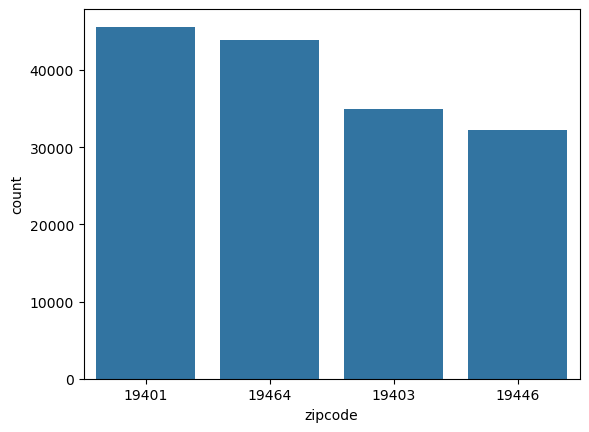

In [20]:
#Zipcodes have the most calls
sns.countplot(data=df, x='zipcode', order=df['zipcode'].value_counts().iloc[1:5].index)
plt.show()

## HOW TO PUT YEAR IN ORDER ???????

In [45]:
#The most common reason of people dial in 911 per year
df.groupby(['year','sub_reason']).agg({'sub_reason':'count'})['sub_reason'].nlargest()


year  sub_reason       
2018   VEHICLE ACCIDENT    42531
2016   VEHICLE ACCIDENT    41626
2019   VEHICLE ACCIDENT    41440
2017   VEHICLE ACCIDENT    40915
2020   VEHICLE ACCIDENT    15490
Name: sub_reason, dtype: int64

In [ ]:
df.groupby(['year','sub_reason']).agg({'sub_reason':'count'})['sub_reason'].nlargest()


In [22]:
#Find the percentage unique values in sub_reason
round(df['sub_reason'].value_counts()*100 / len(df['sub_reason']),2)

sub_reason
 VEHICLE ACCIDENT -     22.37
 DISABLED VEHICLE -      7.22
 FIRE ALARM              5.80
 VEHICLE ACCIDENT        5.47
 FALL VICTIM             5.23
                        ...  
 ROAD OBSTRUCTION        0.00
 HIT + RUN               0.00
 PRISONER IN CUSTODY     0.00
 FOOT PATROL             0.00
 ANIMAL COMPLAINT        0.00
Name: count, Length: 95, dtype: float64

=> There are two similar results, which are VEHICLE ACCIDENT - and VEHICLE ACCIDENT, so we need to combine them.

In [23]:
df['sub_reason'] = df['sub_reason'].str.replace(' -','')

In [24]:
#Check the percentage after the modification
round(df['sub_reason'].value_counts()*100 / len(df['sub_reason']),2).head(20)

sub_reason
 VEHICLE ACCIDENT             27.84
 DISABLED VEHICLE              7.22
 FIRE ALARM                    5.80
 FALL VICTIM                   5.23
 RESPIRATORY EMERGENCY         5.16
 CARDIAC EMERGENCY             4.87
 ROAD OBSTRUCTION              3.50
 SUBJECT IN PAIN               2.96
 HEAD INJURY                   2.76
 GENERAL WEAKNESS              1.79
 SEIZURES                      1.63
 SYNCOPAL EPISODE              1.63
 UNKNOWN MEDICAL EMERGENCY     1.61
 MEDICAL ALERT ALARM           1.57
 ALTERED MENTAL STATUS         1.52
 FIRE INVESTIGATION            1.44
 ABDOMINAL PAINS               1.36
 UNCONSCIOUS SUBJECT           1.33
 OVERDOSE                      1.26
 CVA/STROKE                    1.25
Name: count, dtype: float64

=> Previously, the VEHICLE ACCIDENT was about 22%, it's approximately 28% after the correction.
Now let's plot this field.

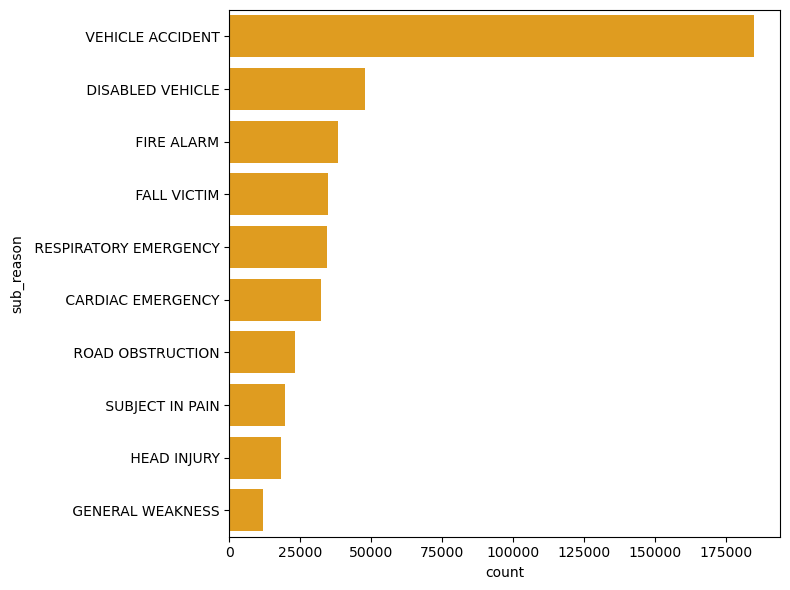

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(y='sub_reason', order=df['sub_reason'].value_counts().iloc[:10].index,color='orange', data=df)
plt.tight_layout()

In [26]:
#What township makes the most calls per year
yr_ls = [2015, 2016, 2017, 2018, 2019, 2020]
for yr in range(len(yr_ls)): 
    print(f'Year {yr_ls[yr]:}')
    twn = df.loc[df['year'] == yr_ls[yr]]['township'].value_counts().iloc[:1].index
    print(twn[0])

Year 2015
LOWER MERION
Year 2016
LOWER MERION
Year 2017
LOWER MERION
Year 2018
LOWER MERION
Year 2019
LOWER MERION
Year 2020
LOWER MERION


In [92]:
df.head()

,lat,lng,desc,zipcode,title,timeStamp,township,address,year,month,day,hour,reason,sub_reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,2015,December,Thursday,17,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,2015,December,Thursday,17,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,2015,December,Thursday,14,EMS,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,2015,December,Thursday,16,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,2015,December,Thursday,16,EMS,DIZZINESS


In [82]:
#Towns with highest number of fire alarm.(in percentage)
fire_filt = df['reason'] == 'Fire'
round(df.groupby(['township',fire_filt])['reason'].count().sort_values(ascending=False).values[0] * 100 / len(df['reason']), 2)


6.84

In [85]:
#Towns with highest number of EMS.(in percentage)
ems_filt = df['reason'] == 'EMS'
round(df.groupby(['township', ems_filt])['reason'].count().sort_values(ascending=False).values[0]* 100 / len(df['reason']), 2)

8.37

In [89]:
#Towns with highest number of traffic.(in percentage)
traffic_filt = df['reason'] == 'Traffic'
round(df.groupby(['township',traffic_filt])['reason'].count().sort_values(ascending=False).values[0] * 100 / len(df['reason']), 2)


8.37

<Axes: title={'center': 'Top 10 cities on 911 calls'}, xlabel='township', ylabel='address'>

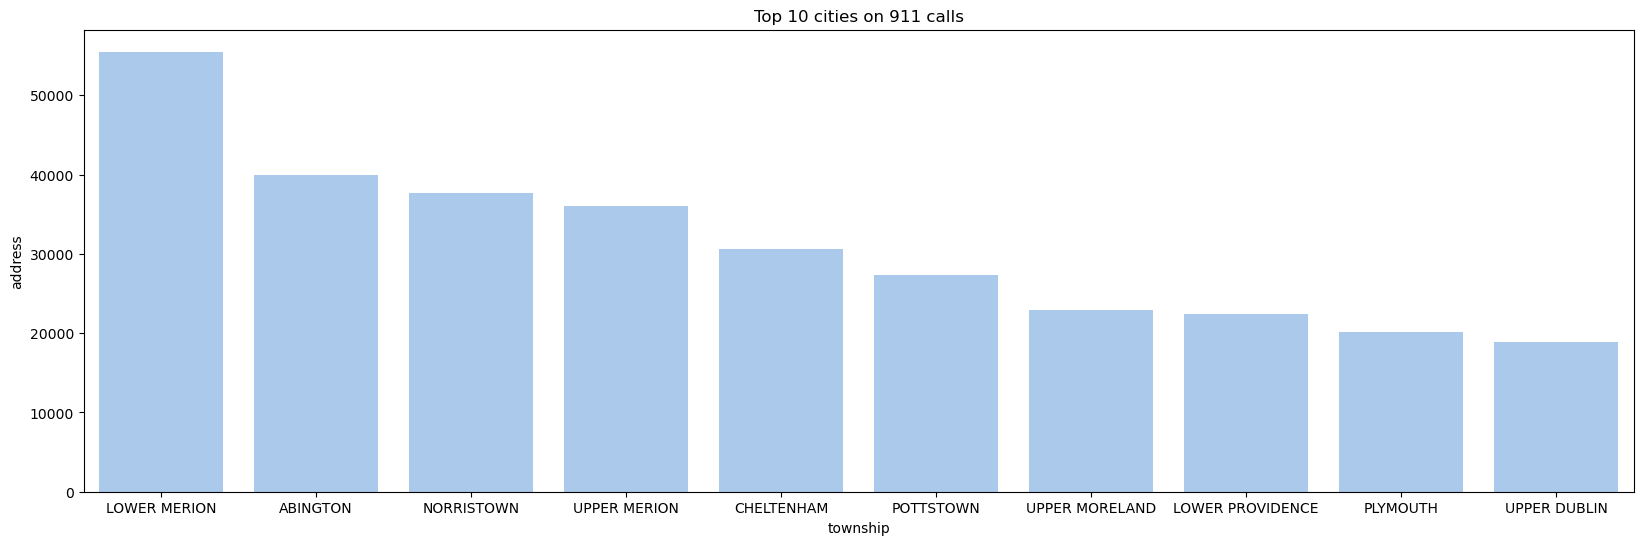

In [78]:
by_twp = df.groupby(['township']).count()
by_twp.sort_values(by='address', ascending = False, inplace=True)
by_twp = by_twp.head(10)
plt.figure(figsize=(20,6))
plt.title('Top 10 cities on 911 calls')
sns.barplot(x='township', y='address', data=by_twp.reset_index())

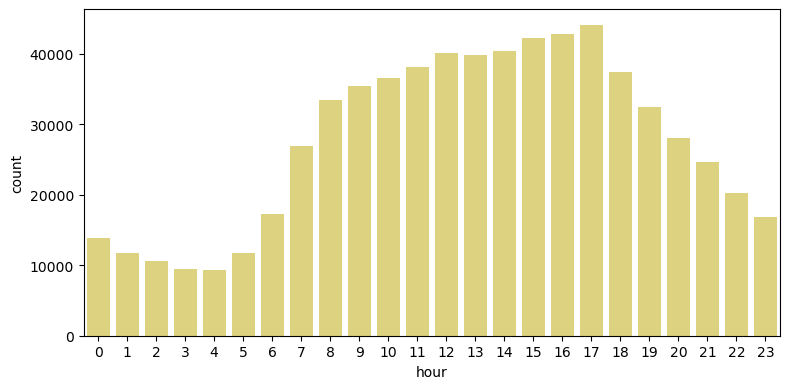

In [29]:
#In which time range, the maximum of calls were made?
plt.figure(figsize=(8,4))
sns.countplot(x='hour',data=df, color='#ebde71')
plt.tight_layout()
plt.show()

=> Most calls occured between 2pm to 5pm.

<h3> Visualizing the calls by day, month, and year (with reasons) </h3>

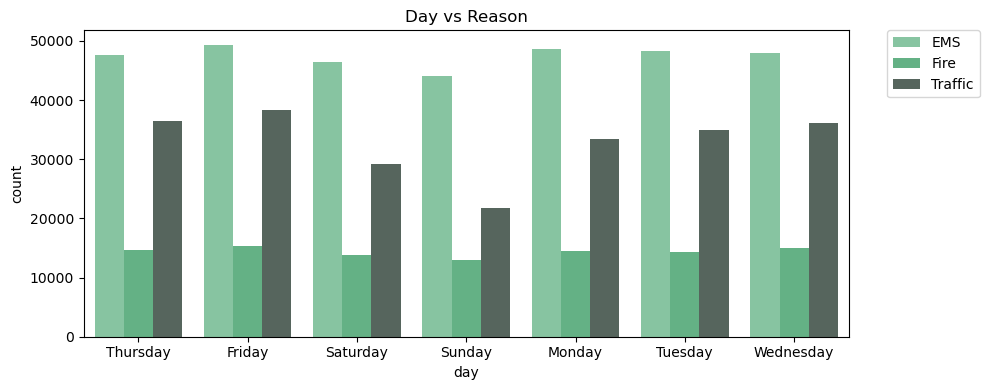

In [30]:
plt.figure(figsize=(10,4))

sns.countplot(x='day',data=df, hue='reason',palette=sns.color_palette(['#7DCEA0', '#57BE83', '#54675D']))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Day vs Reason')
plt.tight_layout()
plt.show()

=> EMS remains the common reason people call for emergencies throughout the week

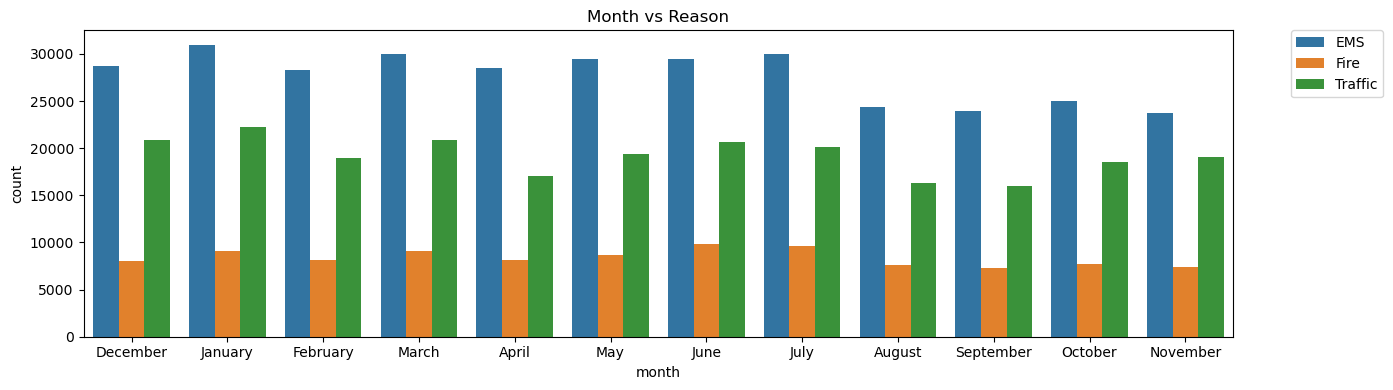

In [31]:
plt.figure(figsize=(14,4))

sns.countplot(x='month',data=df, hue='reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Month vs Reason')
plt.tight_layout()
plt.show()

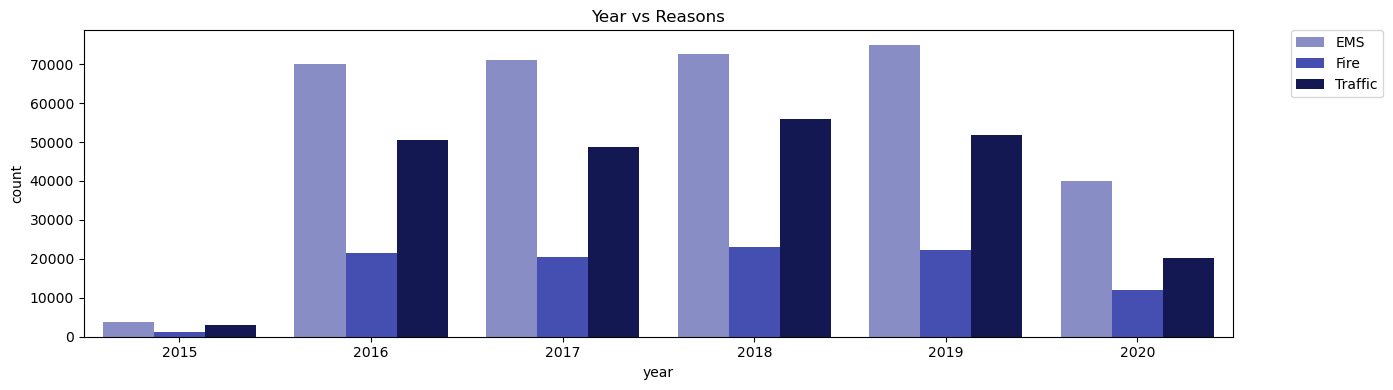

In [32]:
plt.figure(figsize=(14,4))
colors = ['#7e85cf', '#3340c4', '#080f5e']
customPalette = sns.set_palette(sns.color_palette(colors))

sns.countplot(x='year',data=df, hue='reason', palette=customPalette)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Year vs Reasons')
plt.tight_layout()
plt.show()

In [33]:
# plot = sns.scatterplot(df.loc[:,'length'], 
#                        df.loc[:,'type'],
#                        hue = df.loc[:,'temperature'],
#                        legend = False, 
#                        s = 200)

<h3> Visualizing 911 calls  by day, month, and year (with no reasons) </h3>

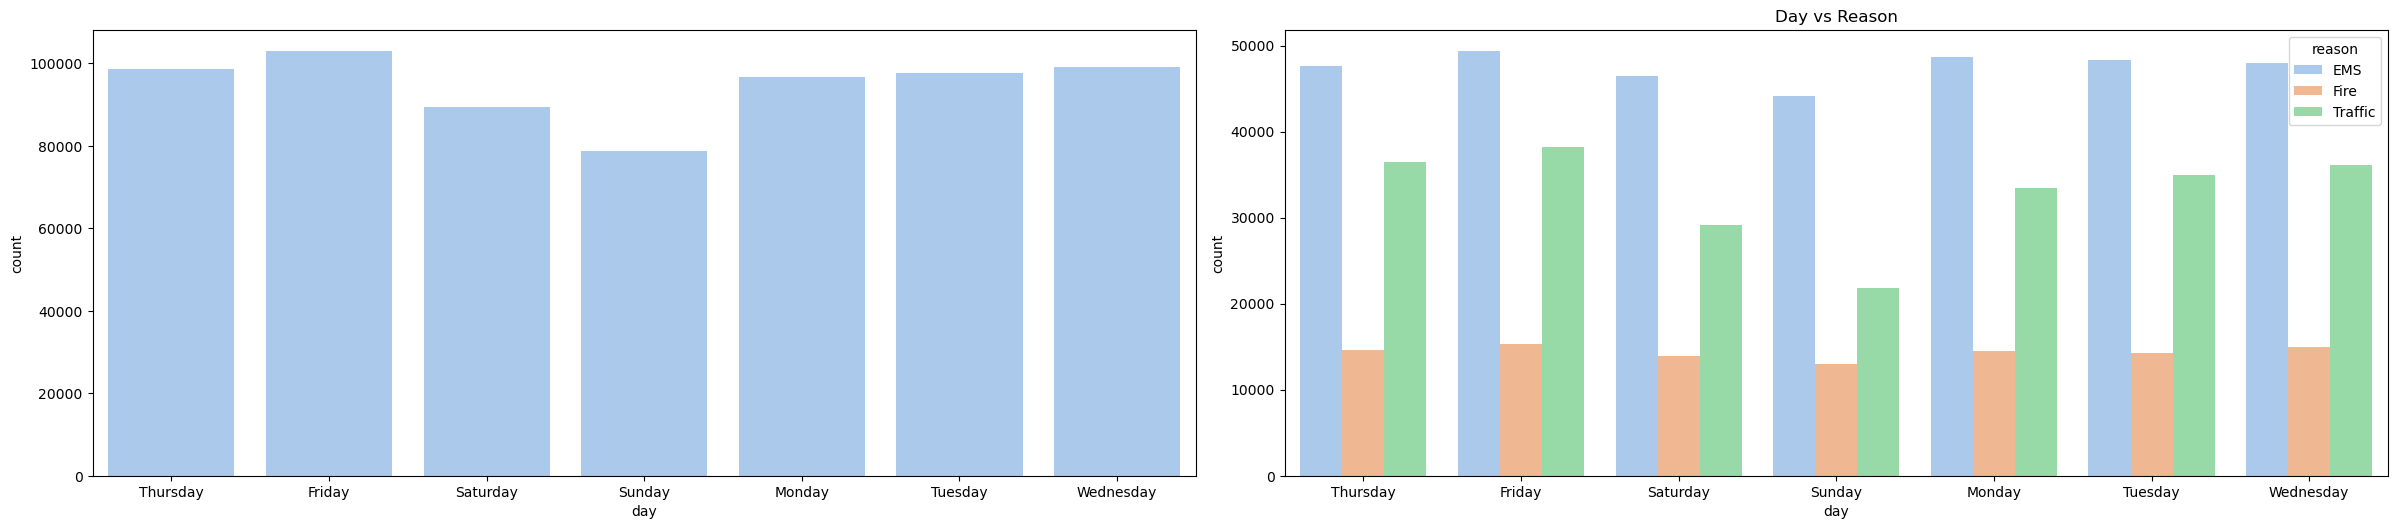

In [34]:
plt.figure(figsize=(36,10))
sns.set_palette('pastel')
plt.subplot(2,3,1)
sns.countplot(data=df, x='day')
# plt.title()
plt.subplot(2,3,2)
sns.countplot(x='day',data=df,hue='reason')
plt.title('Day vs Reason')
plt.tight_layout()
plt.show()

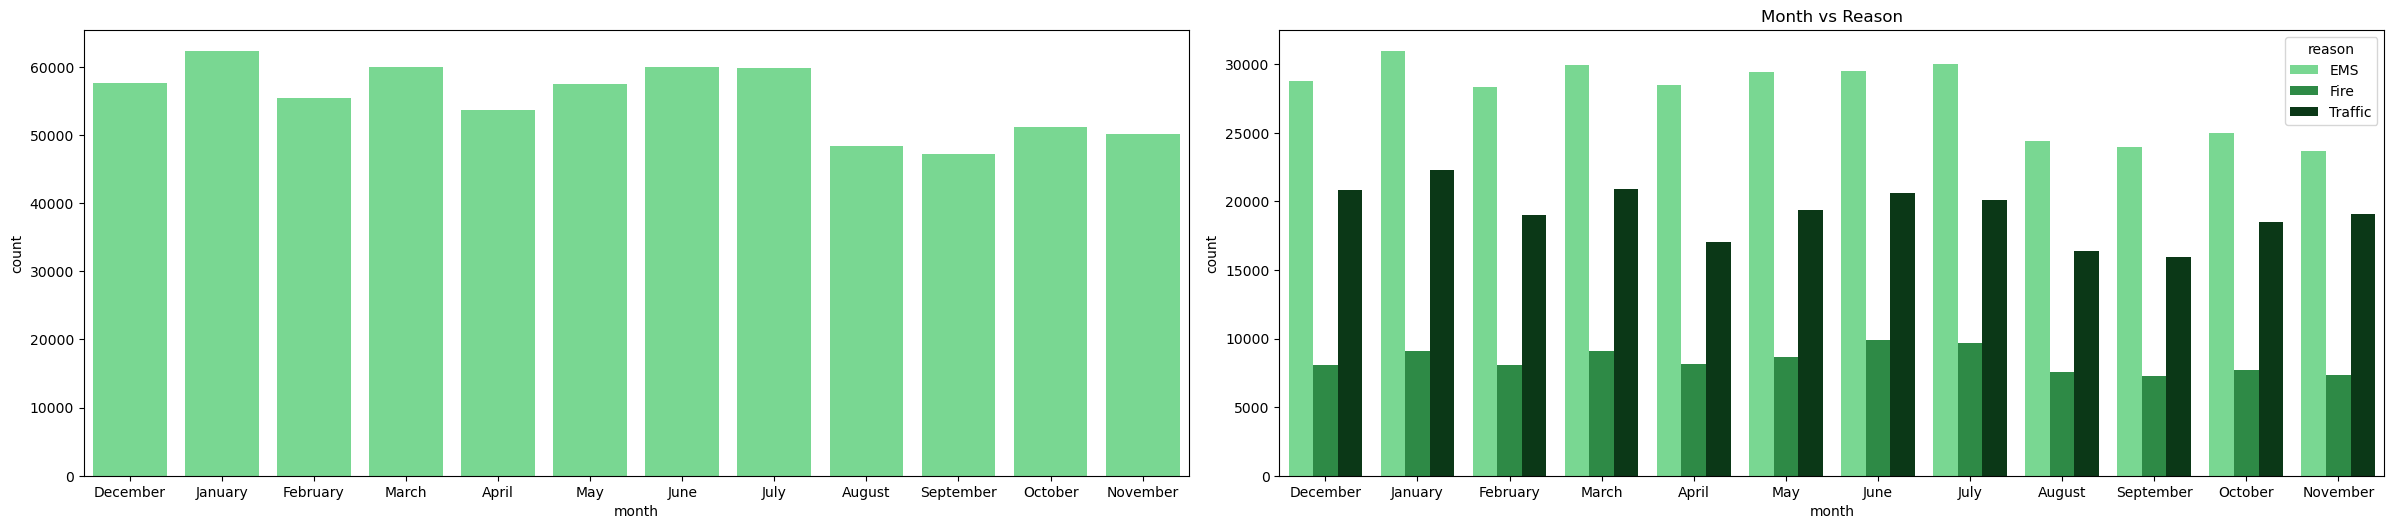

In [35]:
plt.figure(figsize=(36,10))
plt.subplot(2,3,1)
sns.countplot(data=df, x='month', color='#6ae68b')
# plt.title()
plt.subplot(2,3,2)
sns.countplot(x='month',data=df,hue='reason', palette= sns.color_palette(['#6ae68b','#1f993f','#034013']))
plt.title('Month vs Reason')
plt.tight_layout()
plt.show()

=> It appears that there is a lower demand for emergency helps towards the end of the year

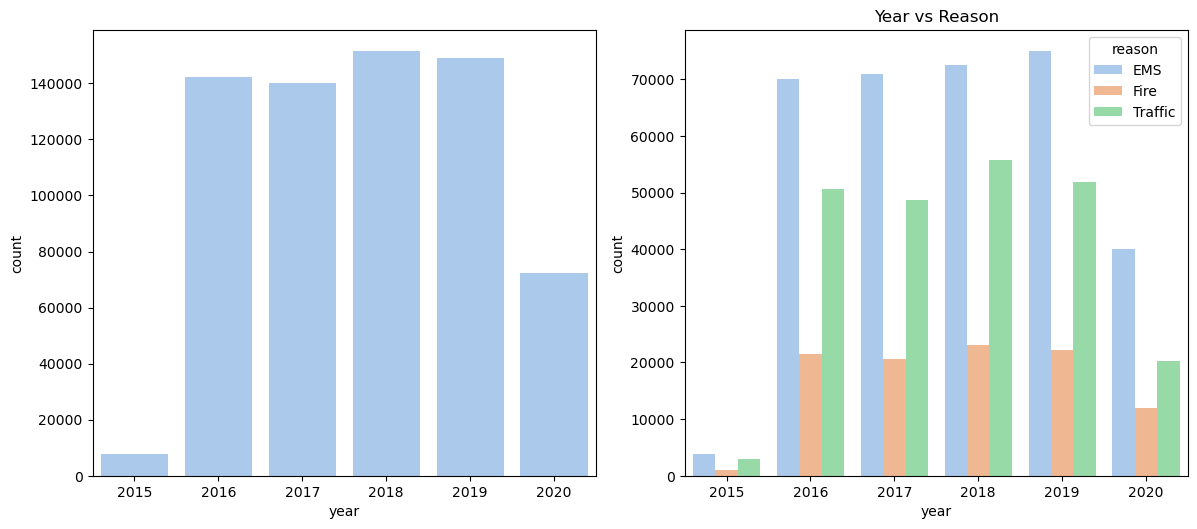

In [36]:
plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
sns.countplot(data=df, x='year')
plt.subplot(2,3,2)
sns.countplot(x='year',data=df,hue='reason')
plt.title('Year vs Reason')
plt.tight_layout()
plt.show()

## Incidents by Percentage Graphs

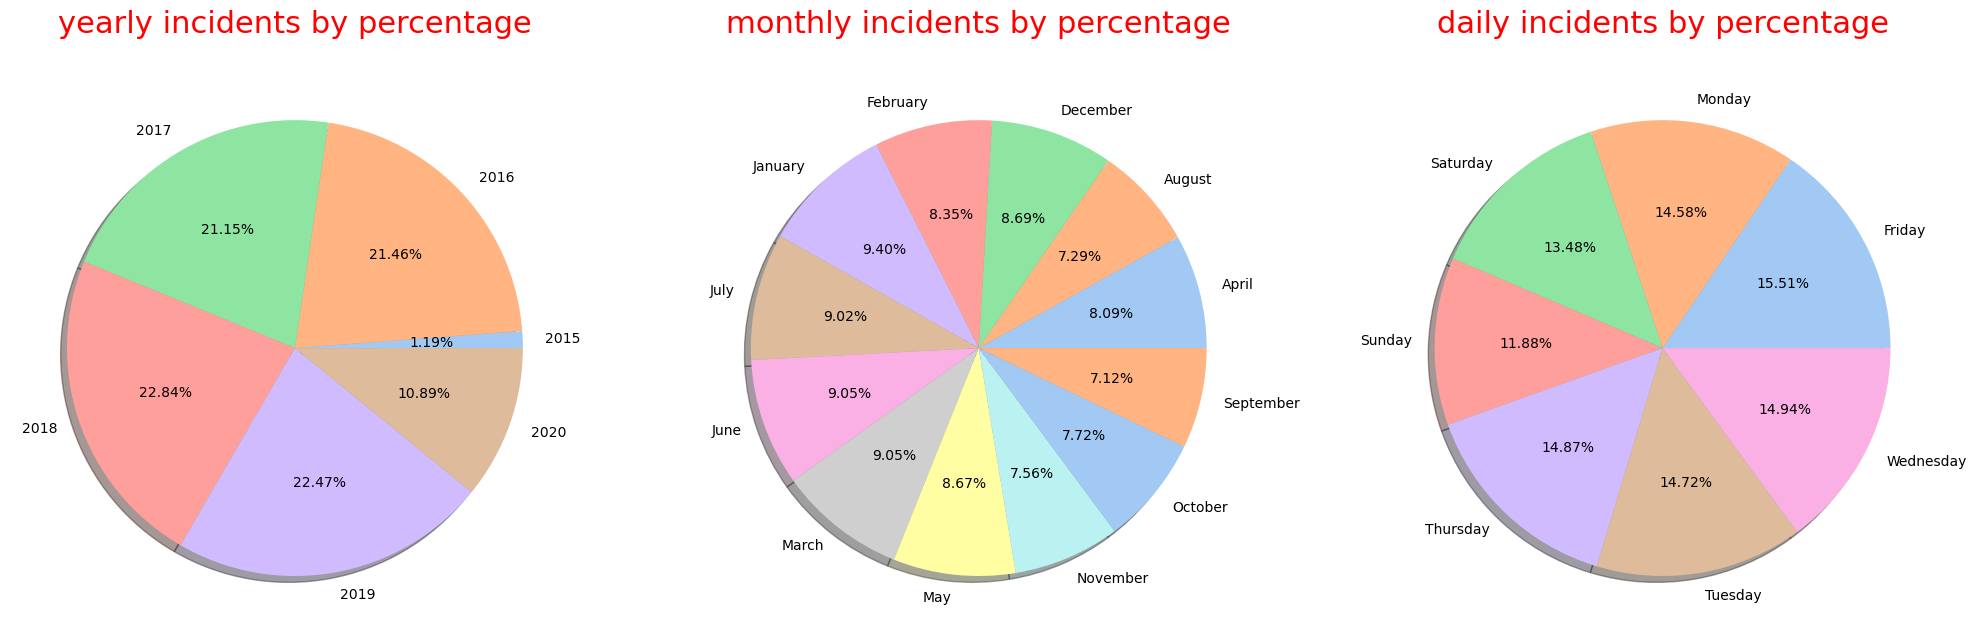

In [136]:
plt.figure(figsize=(25,20))
cols = ['year','month','day']

for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    val = df.groupby(df[cols[i]])['reason'].count().values
    max_val = max(val)
    explode = tuple([0 if j != max_val else 0.2 for j in range(len(val))])
    plt.pie(val, labels = df.groupby(cols[i])['reason'].count().index, autopct='%.2f%%',explode=explode,shadow=True)
    plt.title(f'{cols[i]}ly incidents by percentage', color='red', fontsize= 22, pad=22)
    if cols[i] == 'day':
        plt.title(f'daily incidents by percentage', color='red', fontsize= 22, pad=22)
    

Let's look at a heatmap using seaborn and our data. 
First, we will need to restructure the DataFrae so that the columns become Hours and the Index becomes the Day of the week.

In [37]:
df.groupby(['day','hour']).count()

lat   lng  desc  zipcode  title  timeStamp  township  \
day       hour                                                          
Friday    0     1981  1981  1981     1981   1981       1981      1981   
          1     1632  1632  1632     1632   1632       1632      1632   
          2     1449  1449  1449     1449   1449       1449      1449   
          3     1296  1296  1296     1296   1296       1296      1296   
          4     1338  1338  1338     1338   1338       1338      1338   
...              ...   ...   ...      ...    ...        ...       ...   
Wednesday 19    4684  4684  4684     4684   4684       4684      4684   
          20    4113  4113  4113     4113   4113       4113      4113   
          21    3530  3530  3530     3530   3530       3530      3530   
          22    2825  2825  2825     2825   2825       2825      2825   
          23    2204  2204  2204     2204   2204       2204      2204   

                address  year  month  reason  sub_reason  
day       hour                                            
Friday    0        1981  1981   1981    1981        1981  
          1        1632  1632   1632    1632        1632  
          2        1449  1449   1449    1449        1449  
          3        1296  1296   1296    1296        1296  
          4        1338  1338   1338    1338        1338  
...                 ...   ...    ...     ...         ...  
Wednesday 19       4684  4684   4684    4684        4684  
          20       4113  4113   4113    4113        4113  
          21       3530  3530   3530    3530        3530  
          22       2825  2825   2825    2825        2825  
          23       2204  2204   2204    2204        2204  

[168 rows x 12 columns]

In [38]:
byMonth = df.groupby(['month']).count()
plt.show()

<Axes: xlabel='hour', ylabel='day'>

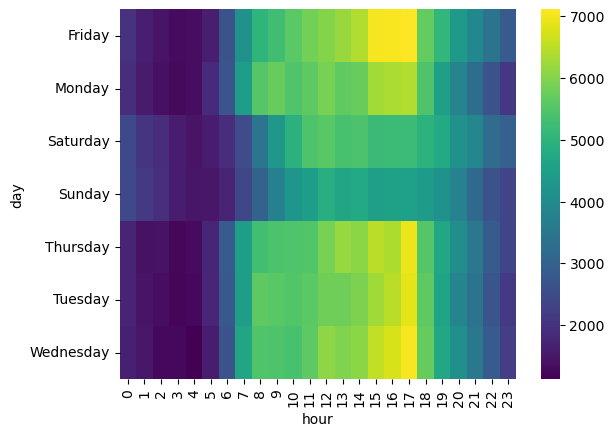

In [39]:
day_hour = df.groupby(['day','hour']).count()['reason'].unstack()
sns.heatmap(day_hour,cmap='viridis')

<Axes: xlabel='month', ylabel='day'>

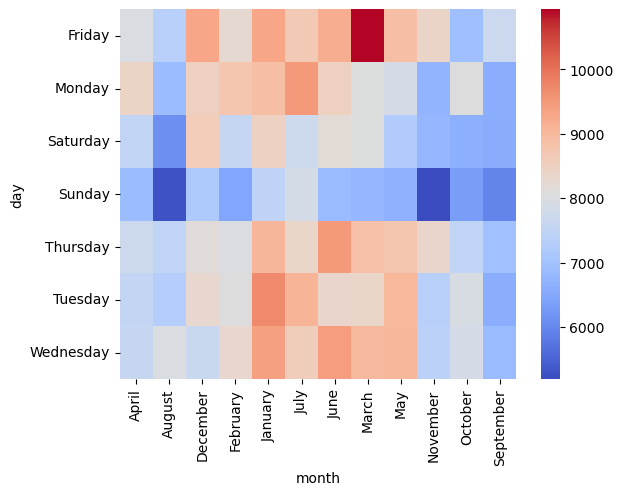

In [40]:
day_month=df.groupby(['day','month']).count()['reason'].unstack()
sns.heatmap(day_month, cmap='coolwarm')

=> On fridays in March recorded the highest number of calls